In [1]:
import numpy as np
from training_data import generate_stationary_agent_choices
from collections import Counter
import pandas as pd

In [2]:
from load_data import load_common_metadata
from outguesser import linear_choice_history_dependent_model

In [3]:
from outguesser import separate_choices_sequences_into_history_and_choice

from outguesser import momentum_gradient_descent, maximum_a_posteriori

In [4]:
data_dir = '../experiments/'
metadata = load_common_metadata(data_dir)

In [41]:
metadata

,AgentName,ChoicesFile,ConfigFile,Date,DeviceType,GameIdx,GameVariant,ModelFile
0,alessandro,agent_choices_alessandro_0001.csv,config/experiment1.json,20180828_08:31:30,Desktop,1,no_feedback_v1,model_params_alessandro_0001.csv
1,sara,agent_choices_sara_0001.csv,config/experiment2.json,20180828_14:24:07,Desktop,1,no_feedback_v2,model_params_sara_0001.csv
2,bhanu,agent_choices_bhanu_0002.csv,config/experiment1.json,20180828_10:20:20,Mobile,2,no_feedback_v1,model_params_bhanu_0002.csv
3,paulpfeiffer,agent_choices_paulpfeiffer_0002.csv,config/experiment1.json,20180828_10:21:55,Mobile,2,no_feedback_v1,model_params_paulpfeiffer_0002.csv
4,samuel,agent_choices_samuel_0001.csv,config/experiment2.json,20180828_14:08:56,Desktop,1,no_feedback_v2,model_params_samuel_0001.csv
5,lr,agent_choices_lr_0001.csv,config/experiment2.json,20180828_14:19:14,Desktop,1,no_feedback_v2,model_params_lr_0001.csv
6,paulpfeiffer,agent_choices_paulpfeiffer_0001.csv,config/experiment1.json,20180827_23:12:38,Desktop,1,no_feedback_v1,model_params_paulpfeiffer_0001.csv
7,chen,agent_choices_chen_0001.csv,config/experiment2.json,20180828_14:16:44,Desktop,1,no_feedback_v2,model_params_chen_0001.csv
8,alex,agent_choices_alex_0001.csv,config/experiment2.json,20180828_14:21:02,Mobile,1,no_feedback_v2,model_params_alex_0001.csv
9,bhanu,agent_choices_bhanu_0001.csv,config/experiment1.json,20180827_23:17:35,Desktop,1,no_feedback_v1,model_params_bhanu_0001.csv


In:
* agent, history length, cross validation

Out: 
* parameters, classification error

In [5]:
def get_model_params(expdataframe, weight_prior, optimizer):
    choices = pd.DataFrame.from_csv(data_dir + expdataframe['ChoicesFile'])['AgentChoice'].values
    weights = optimizer(weight_prior, choices)
    return weights

# Bias and serial correlations

In [6]:
history_length = 10
weight_prior = np.zeros((history_length+1))


In [7]:
model_params=[]
for i in range(len(metadata)):
    model_params = model_params + [get_model_params(metadata.iloc[i], weight_prior, linear_choice_history_dependent_model)]
    

In [8]:
mean_abs_weights = np.mean(np.abs(np.array(model_params)), axis=0)

### Plot

### Show biases

In [9]:
import matplotlib.pyplot as plt

(-0.6, 0.6)

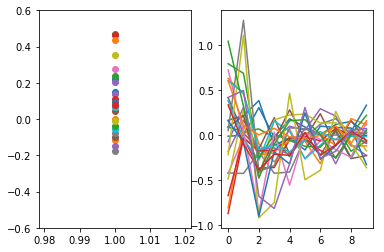

In [10]:
fig = plt.figure()
ax_bias = fig.add_subplot(121)
ax_weights = fig.add_subplot(122)

for model_param in model_params:
    ax_bias.scatter(1,model_param[0])
    ax_weights.plot(list(range(len(model_param[1:]))), model_param[-1:0:-1])
    
ax_bias.set_ylim(-0.6,0.6)


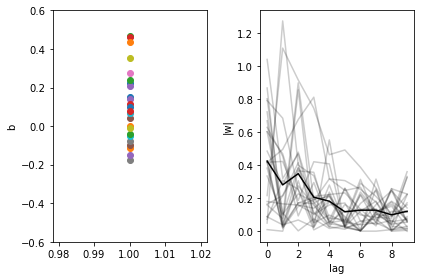

In [11]:
fig = plt.figure()
ax_bias = fig.add_subplot(121)
ax_weights = fig.add_subplot(122)

for model_param in model_params:
    ax_bias.scatter(1,model_param[0])
    ax_weights.plot(list(range(len(model_param[1:]))), np.abs(model_param[-1:0:-1]), color='k', alpha=0.2)
    
ax_weights.plot(list(range(len(model_param[1:]))), mean_abs_weights[-1:0:-1], color='k')    

ax_bias.set_ylim(-0.6,0.6)
ax_bias.set_ylabel('b')
ax_weights.set_xlabel('lag')
ax_weights.set_ylabel('|w|')

plt.tight_layout()

* add probability of a 1 on the left figure

In [12]:
from training_data import sigmoid

### Classification error

In [13]:
def get_classification_error(experiment, history_length):
    choices = pd.DataFrame.from_csv(data_dir + experiment['ChoicesFile'])['AgentChoice'].values
    x, y = separate_choices_sequences_into_history_and_choice(choices, history_length)
    number_of_data_points = x.shape[1]
    validation_chunk_size = int(validation_ratio*number_of_data_points)
    all_indxs = np.arange(0, number_of_data_points)
    weight_prior = np.zeros((history_length+1,))

    classification_error=[]
    for i in np.arange(0, int(number_of_data_points/validation_chunk_size)):
        test_idxs = np.arange(i*validation_chunk_size, (i+1)*validation_chunk_size)
        training_idxs = np.array(list(set(all_indxs)-set(test_idxs)))
        model_params = momentum_gradient_descent(weight_prior, x[:,training_idxs], y[training_idxs])
        predictions = [maximum_a_posteriori(model_params,x_i) for x_i in np.transpose(x[:, test_idxs])]
        classification_error.append(np.sum(predictions!=y[test_idxs])/validation_chunk_size)
    return classification_error
    

#### Cross validation

In [36]:
validation_ratio = 0.2
history_length = 5

In [37]:
classification_errors=[]
for i in range(len(metadata)):
    classification_errors.append(get_classification_error(metadata.iloc[i], history_length))
    

In [38]:
mean_class_errors = np.mean(np.array(classification_errors), axis=1)

In [39]:
np.mean(mean_class_errors)

0.3751836734693878

#### Ranking

In [40]:
list(zip(metadata['AgentName'].values, mean_class_errors))

[('alessandro', 0.4612244897959184),
 ('sara', 0.32244897959183672),
 ('bhanu', 0.42857142857142855),
 ('paulpfeiffer', 0.34285714285714286),
 ('samuel', 0.47346938775510206),
 ('lr', 0.45306122448979591),
 ('paulpfeiffer', 0.43673469387755104),
 ('chen', 0.34285714285714286),
 ('alex', 0.33469387755102042),
 ('bhanu', 0.44489795918367347),
 ('ninjaturtle', 0.45306122448979591),
 ('paulpfeiffer', 0.31428571428571422),
 ('poornima', 0.2857142857142857),
 ('nikita', 0.34693877551020408),
 ('ninjaturtle', 0.49795918367346942),
 ('andre', 0.49387755102040815),
 ('amadeus', 0.32244897959183672),
 ('laura', 0.25714285714285717),
 ('amadeus', 0.28163265306122454),
 ('sr', 0.33061224489795921),
 ('poornima', 0.28979591836734692),
 ('brianlau', 0.3836734693877551),
 ('monzilur', 0.34693877551020413),
 ('vincent', 0.42040816326530611),
 ('vassilis', 0.31428571428571433)]

non linear features
Laplace

## Blop

In [19]:
def get_pattern_counts(choices, history_length):
    words = [choices[np.arange(i+history_length,i-1,-1)] for i in range(history_length-1,len(choices)-history_length)]
    words = list(map(lambda array: ".".join(map(str, array)), words))
    return Counter(words)

In [20]:
def get_lower_bound_on_cross_entropy(choices, history_length):
    pattern_counter = get_pattern_counts(choices, history_length)
    probs = np.array(list(pattern_counter.values()))/float(sum(pattern_counter.values()))
    return -np.sum([prob*np.log2(prob) for prob in probs])

# Compare entropy of different agents

In [21]:
number_of_choices = 250
history_length = 1

In [22]:
choices_with_serial_correlations = generate_stationary_agent_choices(number_of_choices, np.array([0, -1]), np.array([-1]))

In [23]:
choices_random = generate_stationary_agent_choices(number_of_choices, np.array([0]), np.array([-1]))

In [24]:
get_lower_bound_on_cross_entropy(choices_with_serial_correlations, history_length)

1.7336299577246317

In [25]:
get_lower_bound_on_cross_entropy(choices_random, history_length)

1.9756707674050658

In [26]:
import pandas as pd

In [27]:
entropies = []
for idx, exp in metadata.iterrows():
    choices = np.array(pd.DataFrame.from_csv(data_dir+exp['ChoicesFile'])['AgentChoice'].values)
    entropies.append(get_lower_bound_on_cross_entropy(choices, 1))

In [28]:
entropy_collector = []
for history_length in range(1, 4):
    entropies = []
    for idx, exp in metadata.iterrows():
        choices = np.array(pd.DataFrame.from_csv(data_dir+exp['ChoicesFile'])['AgentChoice'].values)
        entropies.append(get_lower_bound_on_cross_entropy(choices, history_length))
    entropy_collector.append(entropies)

In [29]:
import matplotlib.pyplot as plt

(0, 4)

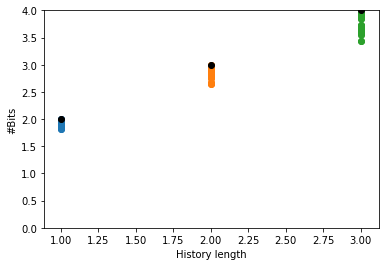

In [30]:
for idx, entropies in enumerate(entropy_collector):
    plt.scatter((idx+1)*np.ones((len(entropies),)), entropies)
    plt.scatter(idx+1, idx+2, color='k')

plt.xlabel('History length')
plt.ylabel('#Bits')
plt.ylim(0, 4)